<img src="NB_images\portada.png" style="width:750px" align="center">

<h1><center>Introduction to Python for Geosciences</center></h1>

<h1><center>Session 4 - Basic statistics</center></h1>

<h2><center>Theory and demonstrations</center></h2>

<h3>Course created by</h3>  

Manuel David Soto

<a  id="toc"></a>

<h3>Table of content</h3>

* [1 Basic statistics](#stat)
* [2 Univariate analysis](#uni)
    * [2.1 Frequency distribution](#freq)
    * [2.2 Central tendency](#central)
    * [2.3 Dispersion](#disp)
    * [2.4 Statistical parameters on your plots](#par)
* [3 Normal distribution](#normal)
    * [3.1 Box plots and outliers](#box)
    * [3.2 Normalization](#norm)
    * [3.3 Other distributions](#other) 
* [4 Bivariate analysis](#bi)
    * [4.1 Plots for exploring correlation](#explo)
    * [4.2 Covariance and correlation coefficient](#cc)
* [Annex of formulas](#annex)

<a  id="stat"></a>

<h1>1 Basic statistics</h1>

Statistics is a powerful tool to understand your data and increase your descriptive capacities. With the calculation of few statistical parameters (median, mode, standard deviation, ...) and the construction of basic plots (PDF, CDF, ...), you will be able to:

* Identify central value of a variable (central tendency)
* Make prediction about missing values (percentiles)
* Identify outliers or anomalies (dispersion)
* Normalize variables
* Compare variables

Python has several libraries that deal with statistics. Depending on your personal taste, the size of your data, and the complexity of the analysis or plot, you can select one or another library. The following link provide an extensive review of statistics and different options available on Python for this important topic:

https://realpython.com/python-statistics/</div>

<a  id="uni"></a>

<h1> 2 Univariate analysis </h1>

Univariate analysis, also calls descriptive statistics, is the statistical analysis of a single variable which involves qualitative (plots) and quantitative (calculation of parameters) tools (we already saw some of them). These tools are link to fundamental concepts of the univariate analysis which are:

 * Frequency distribution
 * Central tendency
 * Dispersion
     
For this topic are going to use several libraries:

* Already seen: Numpy, Matplotlib
* For loading Excel files: Pandas
* Statistical library: Scipy and Seaborn
    
For data, we are going to used the Bolivian mine data, *zn.dat*. So, let´s install Scipy and Seaborn:

In [ ]:
# !pip install scipy
# !pip install seaborn

<a  id="freq"></a>

<h2>2.1 Frequency distribution </h2>

How many times a number (range or bin of numbers) get repeated in my data

In [1]:
# Importing libraries for this part

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Loading and exploring the Pulacayo data with a simple point-line plot before tackling new stuff

zn = np.genfromtxt('Input/zn.dat')
zn

array([17.7, 17.8,  9.5,  5.2,  4.1, 19.2, 12.4, 15.8, 20.8, 24.1, 14.7,
       21.6, 12.8, 11.9, 35.4, 12.3, 14.9, 19.6, 10.6, 15.1, 15.6,  9.3,
        8.1, 13.5, 30.2, 29.1,  7.4, 12.3, 13.6,  9.5, 13.1, 27.4,  8.8,
       11.4,  6.4, 11. , 11.4, 14.1, 20.9, 10.6, 15.3, 24. , 12.3,  7.8,
        9.9, 20.7, 25. , 19.1, 13.1, 27.4, 15.2, 12.2, 10.1, 12.3, 16.7,
       18.6,  6. , 10.6, 11.3,  4.7, 10.9,  6. ,  7.2,  5.6,  8.9,  5.8,
        8.9,  6.7,  7.2,  9.7, 10.8, 17.9, 10.9, 13.7, 22.3, 10.2,  5.1,
       13.9,  9. , 10.6, 13.8,  6.5,  6.5, 10.6, 10.6, 23. , 21.8, 32.8,
       30.2, 30.8, 33.7, 26.5, 39.3, 24.5, 24.9, 23.2, 16. , 20.9, 10.3,
       22.6, 16.2, 22.9, 36.9, 23.5, 18.5, 16.4, 17.9, 18.5, 13.6,  7.9,
       31.9, 14.1,  7.1,  3.9,  3.7, 22.5, 27.6, 17.3])

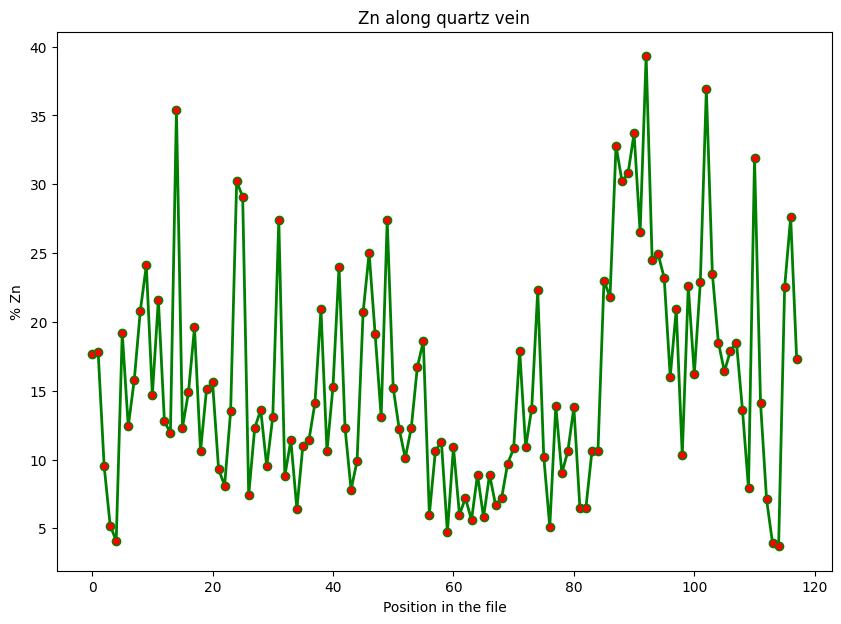

In [3]:
plt.figure(figsize=(10, 7))

plt.plot(zn,"o-", ms=6, mfc="red", lw=2, c="green")

plt.title("Zn along quartz vein")
plt.xlabel("Position in the file")
plt.ylabel("% Zn")
plt.show()

In Matplotlib the function `hist()` gives us an **histogram** which is the main plot to describe the frequency distribution of a continuous variable. Here are three options:

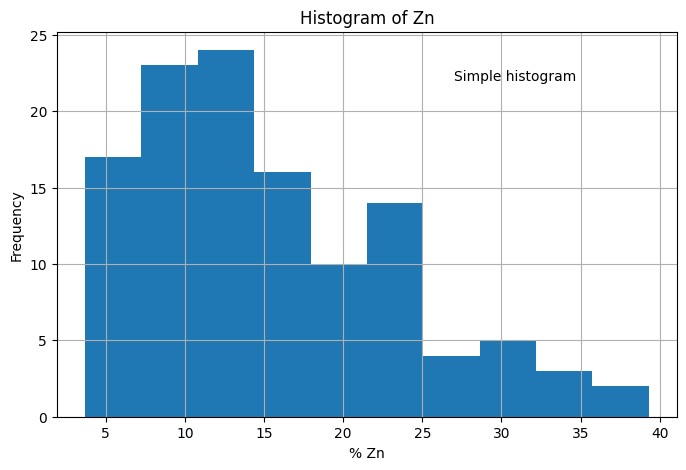

In [4]:
# Simple histogram

plt.figure(figsize=(8, 5))

plt.hist(zn)

plt.title("Histogram of Zn")
plt.xlabel("% Zn")
plt.ylabel("Frequency")

plt.text(27, 22, 'Simple histogram') 

plt.grid(True)
plt.show()

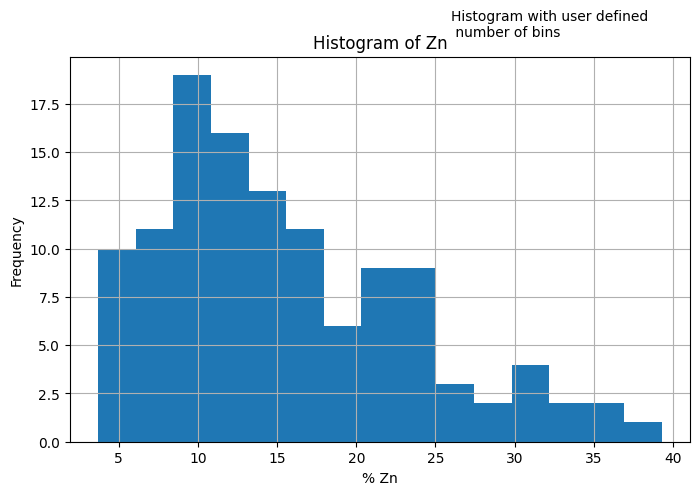

In [8]:
# Histogram with a defined number of bins

plt.figure(figsize=(8, 5))

bin_num = 15

plt.hist(zn, bins = bin_num)

plt.title("Histogram of Zn")
plt.xlabel("% Zn")
plt.ylabel("Frequency")
plt.text(26, 21, 'Histogram with user defined \n number of bins')
plt.grid(True)
plt.show()

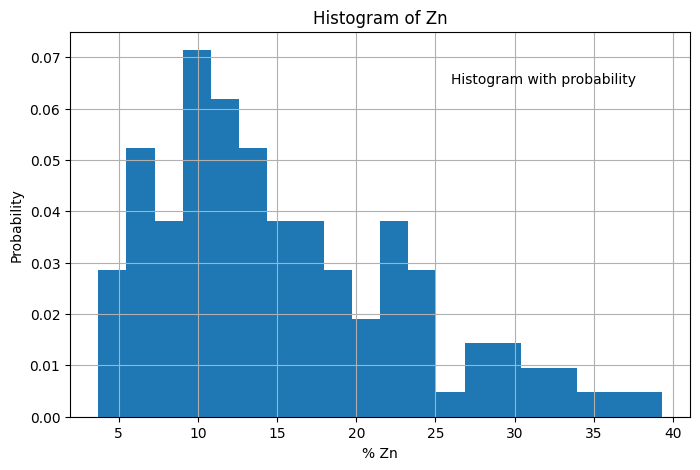

In [9]:
# Histogram with a defined number of bins and scaled as probability

# If number of samples and bins are big this plot tends to the probability density function (PDF).

plt.figure(figsize=(8, 5))

plt.hist(zn, bins=20, density=1)

plt.title("Histogram of Zn")
plt.xlabel("% Zn")
plt.ylabel("Probability")
plt.text(26, 0.065, 'Histogram with probability')
plt.grid(True)
plt.show()

In [10]:
# The main parameters asociated with the frecuency distribution are:

print('samples   =', len(zn))
print('min       =', np.min(zn))
print('max       =', np.max(zn))
zn_range = np.max(zn) - np.min(zn)
print('range     =', zn_range)

print('kurtosis  =', stats.kurtosis(zn))   # function of the scipy library, there is no kurtosis in np.
print('skewness  =', stats.skew(zn))   # function of the scipy library, there is no skew in np.

samples   = 118
min       = 3.7
max       = 39.3
range     = 35.599999999999994
kurtosis  = 0.06225431697564554
skewness  = 0.8130775637287688


### Remember

<img src="NB_images\kurtosis.png" style="width:500px">

Kurtosis tells us how acute is the distribution. Image from:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

<img src="NB_images\skew.png" style="width:750px">

Skewness tells us about the left or right asymmetry (tails) of the distribution. Image from:

https://www.researchgate.net/publication/294890337_ACOUSTIC_EMISSION_TESTS_ON_THE_ANALYSIS_OF_CRACKED_SHAFTS_OF_DIFFERENT_CRACK_DEPTHS/figures?lo=1

<a  id="central"></a>

<h2> 2.2 Central tendency</h2>

Central tendency focus in the identification of the central or more representative value of a variable.

In [12]:
# The main parameters asociated with the central tendency are:


print('mode           =', stats.mode(zn))    # function of the scipy library, there is no mode in np.
print('median         =', round(np.median(zn), 3))
print('mean (average) =', round(np.mean(zn), 3))

mode           = ModeResult(mode=array([10.6]), count=array([6]))
median         = 13.65
mean (average) = 15.608


C:\Users\Manuel David Soto\AppData\Local\Temp\ipykernel_16516\2277597214.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('mode           =', stats.mode(zn))    # function of the scipy library, there is no mode in np.


The formula of mean and others are in the [annex](#annex).

Associated with the **PDF** (probability density function) is the **CDF** (cumulative density function),
it just an histogram of the sorted data.

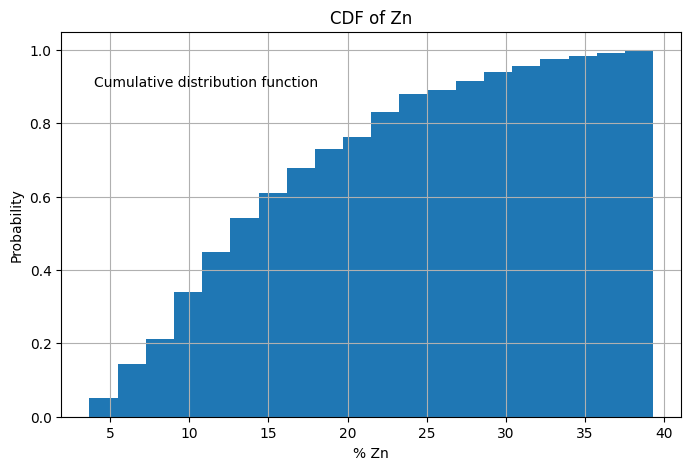

In [13]:
plt.figure(figsize=(8, 5))

plt.hist(zn, bins= 20, density=1, cumulative=1)

plt.title("CDF of Zn")
plt.xlabel("% Zn")
plt.ylabel("Probability")
plt.text(4, 0.9, 'Cumulative distribution function')
plt.grid(True)
plt.show()

The **median**, at the middle of the sorted data, corresponds with the value with **probability of 0.5**.
You also can get the median (p50) and other percentiles thanks to the `np.percentile function`:

In [18]:
print("p1    = ", np.percentile(zn, 1))
print("p10    = ", np.percentile(zn, 10))
print("p25    = ", np.percentile(zn, 25))    # Q1
print("mode = ", stats.mode(zn))
print("(p50)  = ", np.percentile(zn, 50))    # median
print("median = ", np.median(zn))
print("mean   = ", np.mean(zn))
print("p75    = ", np.percentile(zn, 75))    # Q3
print("p90    = ", np.percentile(zn, 90))
print("p100    = ", np.percentile(zn, 100))

# Remember, for Repsol the percentile are inverted

p1    =  3.9339999999999997
p10    =  6.5
p25    =  9.95
mode =  ModeResult(mode=array([10.6]), count=array([6]))
(p50)  =  13.649999999999999
median =  13.649999999999999
mean   =  15.607627118644068
p75    =  20.875
p90    =  27.4
p100    =  39.3


C:\Users\Manuel David Soto\AppData\Local\Temp\ipykernel_16516\2849897647.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("mode = ", stats.mode(zn))


<a  id="disp"></a>

<h2> 2.3 Dispersion </h2>

In statistics dispersion means how much the values of a variable are spread out from the central value (mean). The main parameters associated with the dispersion are standard deviation and variance.

In [19]:
# Standard deviation and variance

print('standart deviation =', np.std(zn))
print('variance           =', np.var(zn))

# std**2 == var

standart deviation = 7.974080434521196
variance           = 63.58595877621374


<a  id="par"></a>

<h2> 2.4 Statistical parameters on your plots </h2>

Once you know how to get the previous statistical parameters you can incorporate them on your plots

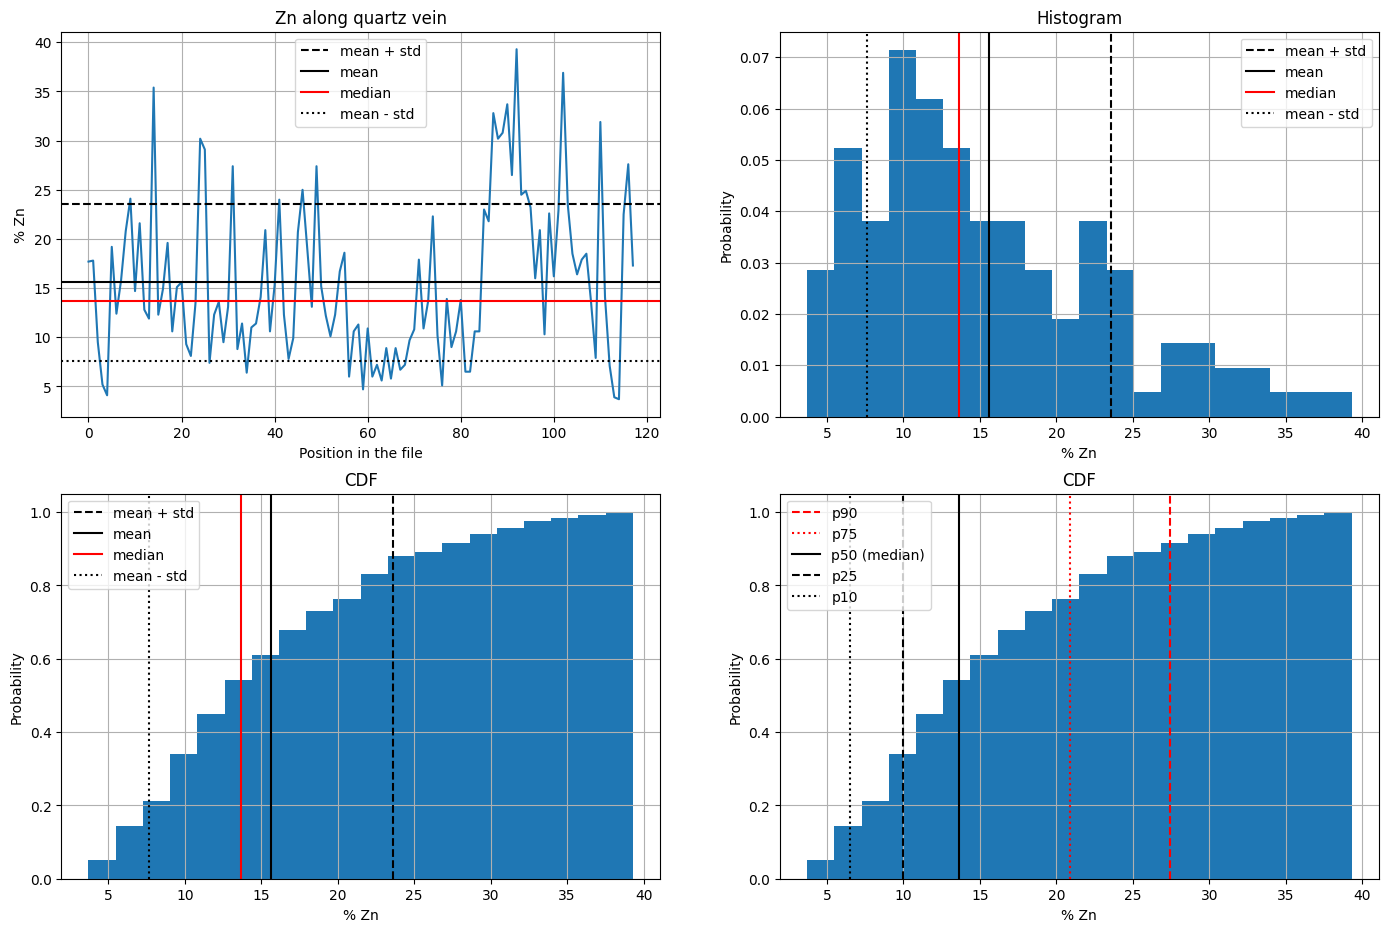

In [20]:
# Line, PDF, and CDF polt with parameters

# Parameters (single values) to be included in the plots

y1 = np.mean(zn) + np.std(zn)
y2 = np.mean(zn)
y3 = np.median(zn)
y4 = np.mean(zn) - np.std(zn)

# Plots

plt.figure(figsize=(17, 11))

# Point-line plot with parameters
plt.subplot(2, 2, 1)
plt.plot(zn)
plt.axhline(y=y1, ls="--", color='black', label="mean + std")
plt.axhline(y=y2, ls="-", color='black', label="mean")
plt.axhline(y=y3, ls="-", color='red', label="median")
plt.axhline(y=y4, ls=":", color='black', label="mean - std")
plt.title("Zn along quartz vein")
plt.xlabel("Position in the file")
plt.ylabel("% Zn")
plt.legend()
plt.grid(True)

# Histogram with parameters
plt.subplot(2, 2, 2)
plt.hist(zn, bins=20, density=1)

# A vertical line
plt.axvline(x=y1, ls="--", color='black', label='mean + std')

plt.axvline(x=y2, ls="-", color='black', label='mean')
plt.axvline(x=y3, ls="-", color='red', label='median')
plt.axvline(x=y4, ls=":", color='black', label='mean - std')
plt.title("Histogram")
plt.xlabel('% Zn')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# CDF with parameters
plt.subplot(2, 2, 3)
plt.hist(zn, bins=20, density=1, cumulative=1)
plt.axvline(x=y1, ls="--", color='black', label='mean + std')
plt.axvline(x=y2, ls="-", color='black', label='mean')
plt.axvline(x=y3, ls="-", color='red', label='median')
plt.axvline(x=y4, ls=":", color='black', label='mean - std')
plt.title("CDF")
plt.xlabel('% Zn')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# CDF with percentiles
plt.subplot(2, 2, 4)
plt.hist(zn, bins=20, density=1, cumulative=1)
plt.axvline(x=np.percentile(zn, 90), ls="--", color='red', label='p90')
plt.axvline(x=np.percentile(zn, 75), ls=":", color='red', label='p75')
plt.axvline(x=np.percentile(zn, 50), ls="-", color='black', label='p50 (median)')
plt.axvline(x=np.percentile(zn, 25), ls="--", color='black', label='p25')
plt.axvline(x=np.percentile(zn, 10), ls=":", color='black', label='p10')
plt.title("CDF")
plt.xlabel('% Zn')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.show()

<a  id="normal"></a>

<h1> 3 Normal distribution </h1>

To advance further, we have to go back and review some aspects of the most important concept in statistics, the normal or Gaussian distribution. The normal distribution is a function that help us to model most of the natural events. Some properties of the normal distribution are:

* It has a characteristic bell shape
* Symmetrical around a central value (mean), that is at the highest point of the curve
* Mean, median, and mode are the same
* Most of the values a around the mean, values far from the mean are less likely to occur
* Area under the curve is one
* Areas of sectors away of the mean, by one, two or three standard deviations, are well establish
* Mean is zero, standard deviation is one

<img src="NB_images\pdf.png" style="width:750px">     
    
Image from: https://www.simplypsychology.org/normal-distribution.html

Where &mu; (mu) for mean (average), &sigma; (sigma) for standard deviation. The formula of the normal distribution and others are in the [annex](#annex).

<a  id="box"></a>

<h2> 3.1 Box plot and outliers</h2>

The box plot is another popular statistical plot that has particular characteristics that allows to define outliers or anomalies. Interquartile Range (IQR) is defined as p75 - p25. Values that fall beyond its upper (Q3 + 1.5 IQR) and lower limit (Q1 - 1.5 IQR) are consider outliers or anomalies. The following image shows how this plot is related to the normal distribution centered in 0 and with standard deviation of one:

<img src="NB_images\box_pdf.png" style="width:750px">

Image from: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [21]:
# Importing libraries for this part

import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Loading the Pulacayo data

zn = np.genfromtxt('Input/zn.dat')

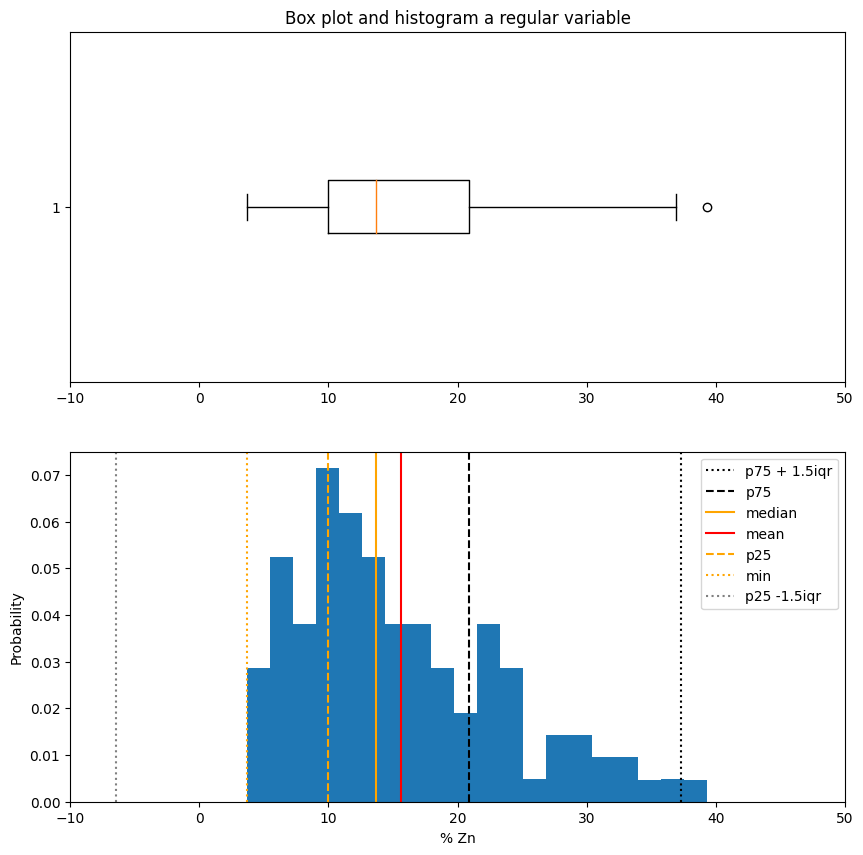

min                = 3.7
max                = 39.3
median             = 13.649999999999999
mean (average)     = 15.607627118644068
standard deviation = 7.974080434521196


In [23]:
# Box plot and histogram for a regular (non normalized) variable

iqr = np.percentile(zn, 75) - np.percentile(zn, 25)  # Inter quartil range

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.boxplot(zn, vert=False)

# This plot is made automatically, apart from vertical option no other parameters are needed

plt.title("Box plot and histogram a regular variable")
plt.xlim(-10, 50)

plt.subplot(2, 1, 2)
plt.hist(zn, bins=20, density=1)

# Let's put the parameters in the histogram that match those in the box plot

plt.axvline(x=np.percentile(zn, 75) + 1.5*iqr, ls=":", color='black', label='p75 + 1.5iqr')
plt.axvline(x=np.percentile(zn, 75), ls="--", color='black', label='p75')
plt.axvline(x=np.median(zn), ls="-", color='orange', label='median')
plt.axvline(x=np.mean(zn), ls="-", color='red', label='mean')
plt.axvline(x=np.percentile(zn, 25), ls="--", color='orange', label='p25')
plt.axvline(x=np.min(zn), ls=":", color='orange', label='min')
plt.axvline(x=np.percentile(zn, 25) - 1.5*iqr, ls=":", color='grey', label='p25 -1.5iqr')
plt.xlim(-10, 50)
plt.xlabel('% Zn')
plt.ylabel('Probability')
plt.legend()

plt.show()

print('min                =', np.min(zn))
print('max                =', np.max(zn))
print('median             =', np.median(zn))
print('mean (average)     =', np.mean(zn))
print('standard deviation =', np.std(zn))


# As (Q1 - 1.5IQR) < min so the lower limit of the box plot is the minimum
# We have a point over the upper limit (Q3 + 1.5IQR) of the box plot so this point can be consider as an outlier.

<a  id="norm"></a>

<h2> 3.2 Normalization</h2>

Normalization is the process of transformation of any distribution or variable in order to appear like a normal distribution (mean of 0 and standard deviation of one). This transformation allows to make comparisons of the variable respect to the normal distributions and make use of its properties.

The **Z-score transformation or normalization** is the most important normalization in statistics because is linked with the normal distribution (is in its definition). It is base in the following formula :

$$Z = \frac{x - \mu}{\sigma}$$

Where 

x: the original variable </br>
&mu: the mean (average) of x </br>
&sigma: is the standard deviation of x.

The mean of normalized data will be zero and the standard deviation will be 1. This formula and others are in the [annex](#annex).

Let's apply this transformation to the zinc in the Pulacayo mine data to see the differences in the parameters and plots.

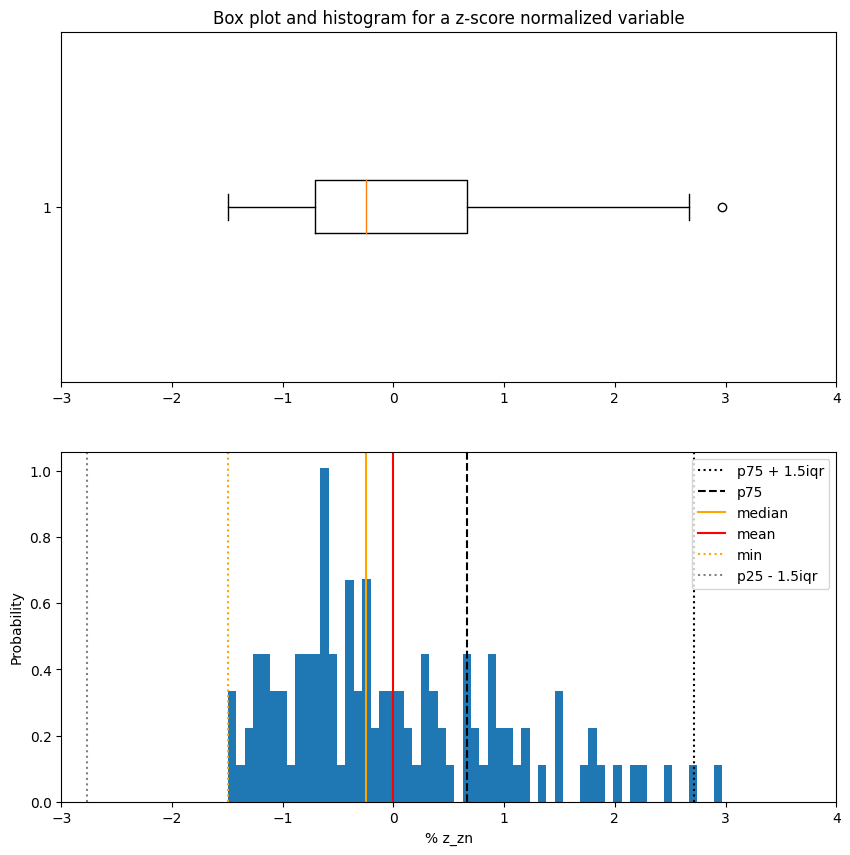

min                = -1.4932915734200345
max                = 2.971173049470066
mean (average)     = 7.056502275159894e-19
median             = -0.24549879258417767
standard deviation = 0.9999999999999999


In [24]:
# Box plot and histogram for a z-score normalized variable

z_zn = (zn - np.mean(zn))/ np.std(zn)

# z_zn is the new variable

iqr = np.percentile(z_zn, 75) - np.percentile(z_zn, 25)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.boxplot(z_zn,vert=False)
plt.title("Box plot and histogram for a z-score normalized variable")
plt.xlim(-3,4)

plt.subplot(2,1,2)
plt.hist(z_zn, bins = 59, density = 1)
plt.axvline(x = np.percentile(z_zn, 75) + 1.5*iqr, ls = ":", color='black',label='p75 + 1.5iqr')
plt.axvline(x = np.percentile(z_zn, 75), ls = "--", color='black',label='p75')
plt.axvline(x = np.median(z_zn), ls = "-", color='orange',label='median')
plt.axvline(x = np.mean(z_zn), ls = "-", color='red',label='mean')
plt.axvline(x = np.min(z_zn), ls = ":", color='orange',label='min')
plt.axvline(x = np.percentile(z_zn, 25) - 1.5*iqr, ls = ":", color='grey',label='p25 - 1.5iqr')
plt.xlim(-3,4)
plt.xlabel ('% z_zn')
plt.ylabel ('Probability')
plt.legend()

plt.show()

print('min                =', np.min(z_zn))
print('max                =', np.max(z_zn))
print('mean (average)     =', np.mean(z_zn))
print('median             =', np.median(z_zn))
print('standard deviation =', np.std(z_zn))

<a  id="box"></a>

<h2> 3.3 Other distributions</h2>

Although many natural phenomena exhibit behaviors that conform to the normal distribution, there are many other processes which fit well to other types of distributions. Numpy, like other statistical libraries (stat, scipy, ...) allows you to generate values for many type distributions.

All Numpy distributions at: https://numpy.org/doc/stable/reference/random/generator.html?highlight=distributions <br>
All Scipy distributions at: https://docs.scipy.org/doc/scipy/reference/stats.html

Apart from the normal, here we present three other distributions, one uniform, one Poisson and one bimodal. Note that each of them has different arguments. The entire explanation at: https://towardsdatascience.com/the-signal-and-the-noise-d82b8630c3ad

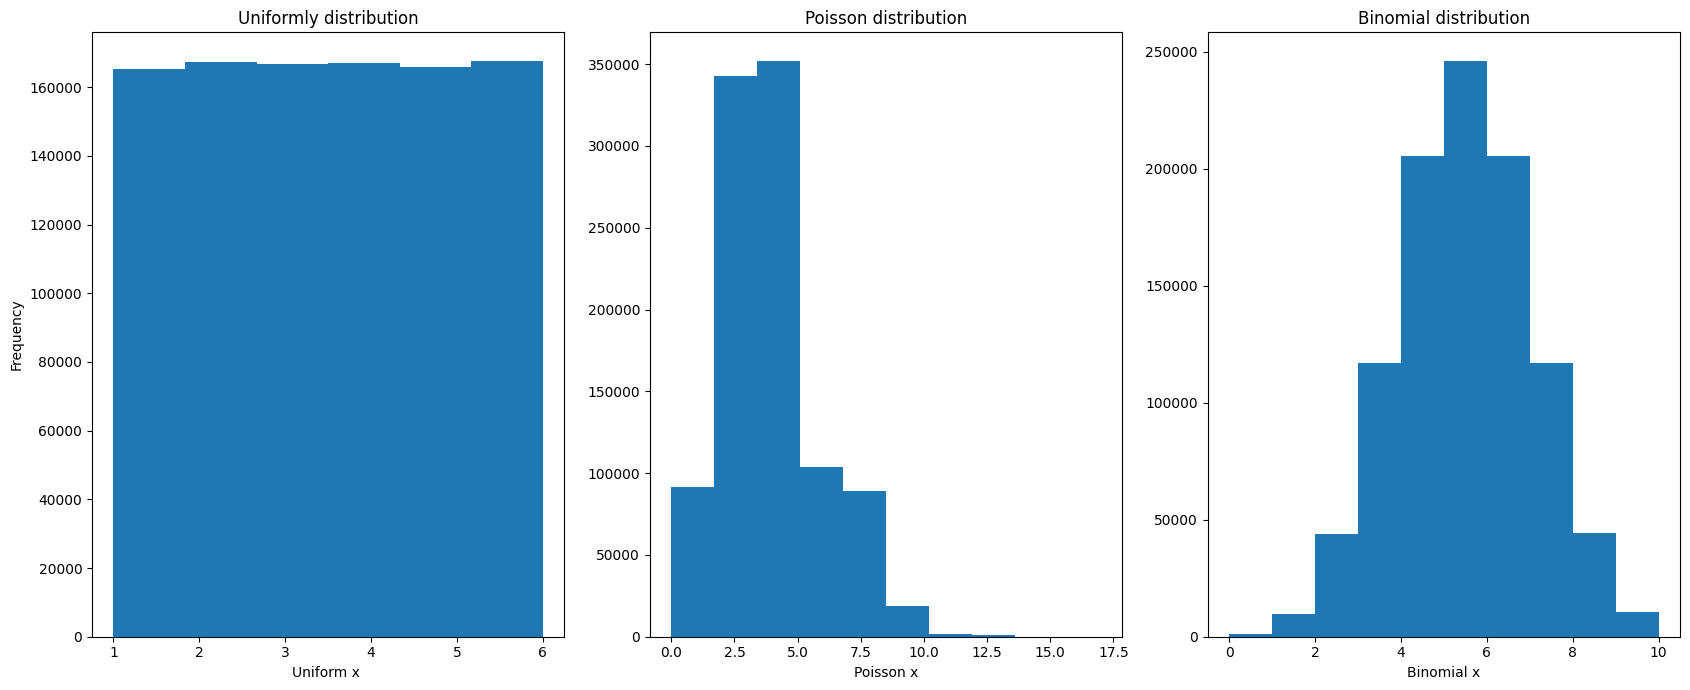

In [25]:
# Number of x to be generated and a easy way to write a big number

sample = 1_000_000 

plt.figure(figsize=(17, 7))

# Uniformly distribution for a 6 sided dice
plt.subplot(1,3,1)
x = np.random.choice([1,2,3,4,5,6],size = sample)
plt.hist(x, bins=6)
plt.title('Uniformly distribution')
plt.xlabel('Uniform x ')
plt.ylabel('Frequency')

# Poisson Distribution for the number of received letters
plt.subplot(1,3,2)
x = np.random.poisson(lam = 4, size = sample)
plt.hist(x, bins=10)
plt.title('Poisson distribution')
plt.xlabel('Poisson x')

# Binomial Distribution for 5 heads in 10 coin flips
plt.subplot(1,3,3)
x = np.random.binomial(10, 0.5,size = sample)
plt.hist(x, bins=10)
plt.title('Binomial distribution')
plt.xlabel('Binomial x')

plt.tight_layout()
plt.show()

[Return to Table of Content](#toc)

<a  id="bi"></a>

<h1> 4 Bivariate analysis </h1>

Bivariate analysis is the statistical analysis that deals with two variables. As the univariate analysis, it involves qualitative tools (plots) and quantitative (calculation of parameters) that help to figure out how (in strength and shape) is the relation between the two variables. For this analysis we are going to cover the following concept-tools:

* Different plots for exploring correlation
* Covariance and correlation coefficient
     
For this demonstration we are going to use a new data set (*core.xlsx*). It is a single-sheet Excel file (new format) that has seven variables of a routine core analysis. As the file format in new, it will require a new procedure for loading which implies the Pandas library:


**Pandas**, originally developed by a financial firm, it is a powerful library for data manipulation and analysis. It provides a data type structure (similar to arrays in Numpy) called dataframe (spreadsheed). In order to load Excel files in Pandas an extra library is needed calls **xlrd**. 

https://pandas.pydata.org/


**Seaborn** library is complimentary to Matplotlib and targets statistical data visualization:

https://seaborn.pydata.org/

If you use a lot of statistics and perform a lot of data analysis instead of numerical calculations, Pandas and seaborn are the right tools. You can install all these libraries by executing the following command in a cmd window or here in the NB:

In [ ]:
# !pip install openpyxl xlrd seaborn

In [27]:
# Importing libraries of the subpart

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import xlrd
import pandas as pd
import seaborn as sns

In [28]:
# Loading the Excel core data with Pandas

dfcore = pd.read_excel('Input/core.xlsx', sheet_name='Sheet1')

# Understanding the new data structure

print("dfcore type: ", type(dfcore))
dfcore.head()

dfcore type:  <class 'pandas.core.frame.DataFrame'>


,sample,depth,he_phi,air_k,klink_k,grain_density,gr
0,1,2568.97,9.844,3.233,2.868,2.640090,53.075
1,2,2569.16,7.327,1.575,1.339,2.610000,64.075
2,3,2569.41,6.973,0.696,0.555,2.690025,44.575
3,4,2569.61,8.109,7.951,7.324,2.620000,83.575
4,5,2569.83,7.646,0.998,0.822,2.670000,101.075


In [29]:
# Basic list of statistical parameters with the Panda's describe() function

dfcore.describe()

,sample,depth,he_phi,air_k,klink_k,grain_density,gr
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.861111,2573.297778,7.399944,5.578472,5.220139,2.664383,82.825000
std,11.037994,2.733281,2.416099,11.527565,11.105947,0.025664,29.747629
min,1.000000,2568.970000,2.778000,0.016000,0.008000,2.610000,24.075000
25%,9.750000,2571.047500,5.768500,0.278750,0.202250,2.649761,58.075000
50%,18.500000,2573.205000,7.486500,1.033500,0.854000,2.660000,85.575000
75%,28.250000,2575.660000,9.575000,4.190500,3.765750,2.682500,102.075000
max,39.000000,2578.280000,11.633000,55.735000,53.814000,2.730000,138.075000


In [30]:
dfcore.gr.describe()

count     36.000000
mean      82.825000
std       29.747629
min       24.075000
25%       58.075000
50%       85.575000
75%      102.075000
max      138.075000
Name: gr, dtype: float64

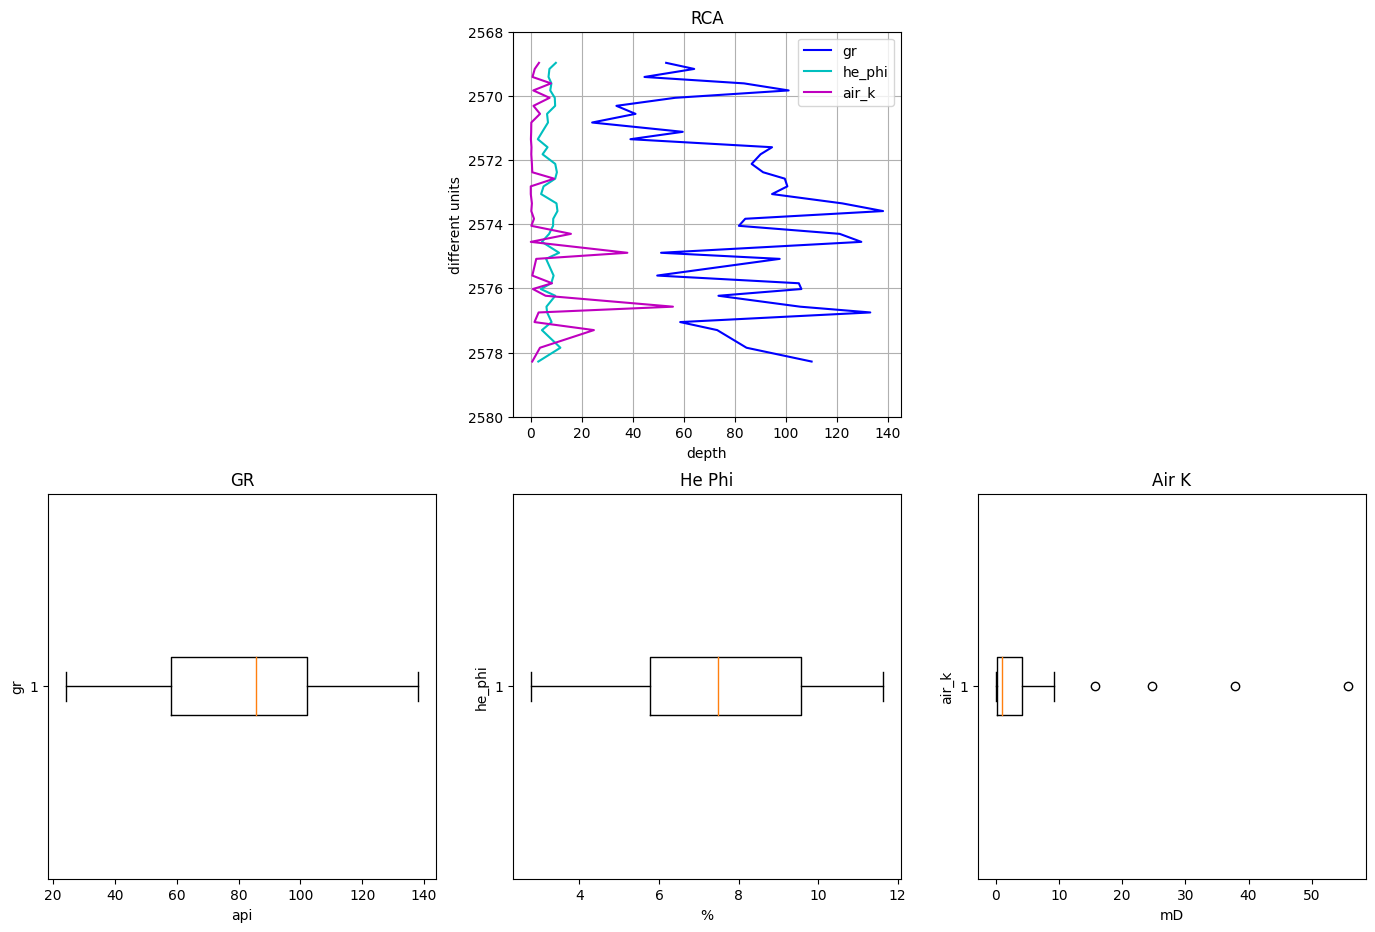

In [31]:
# Let's do some exploratory plots

plt.figure(figsize=(17,11))

# Multi point-line plot
plt.subplot(2,3,2)
plt.plot(dfcore.gr, dfcore.depth, 'b', label="gr")
plt.plot(dfcore.he_phi, dfcore.depth, 'c', label="he_phi")
plt.plot(dfcore.air_k, dfcore.depth,'m', label="air_k")
plt.legend()
plt.ylim(2580, 2568)
plt.grid()
plt.title("RCA")
plt.xlabel("depth")
plt.ylabel("different units")

# Box plot for each variable
plt.subplot(2,3,4)
plt.boxplot(dfcore.gr, vert=False)
plt.title("GR")
plt.ylabel("gr")
plt.xlabel("api")

plt.subplot(2,3,5)
plt.boxplot(dfcore.he_phi, vert=False)
plt.title("He Phi")
plt.ylabel("he_phi")
plt.xlabel("%")

plt.subplot(2,3,6)
plt.boxplot(dfcore.air_k, vert=False)
plt.title("Air K")
plt.ylabel("air_k")
plt.xlabel("mD")

plt.show()

<a  id="explo"></a>

<h2> 4.1 Plots for exploring correlation</h2>

So far we have seen the most basic plot for exploring correlation, the cross or scatter plot. Let's review few more complex option.

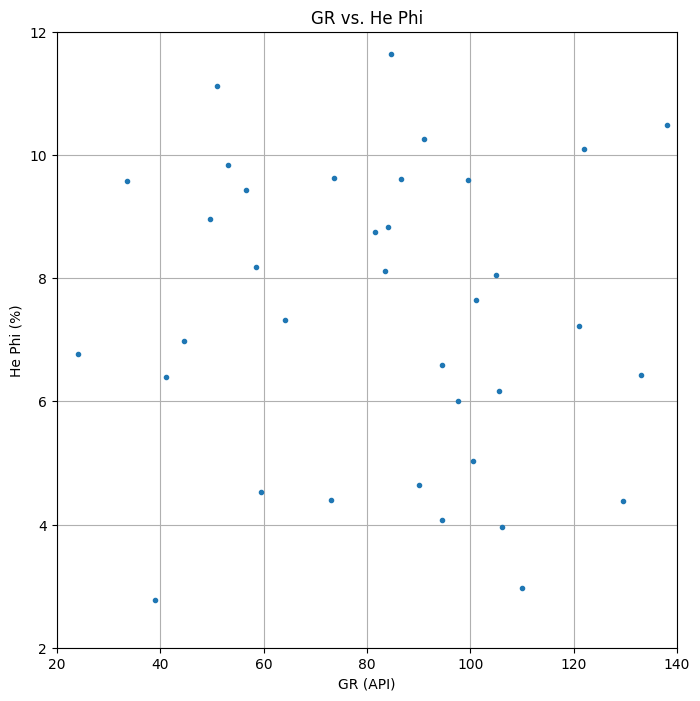

In [32]:
# Previously we did a scatter plot similar to this:

plt.figure(figsize=(8,8))
plt.plot(dfcore.gr, dfcore.he_phi, '.')
plt.xlim(20,140)
plt.ylim(2,12)
plt.title("GR vs. He Phi")
plt.xlabel("GR (API)")
plt.ylabel("He Phi (%)")
plt.grid(True)
plt.show()

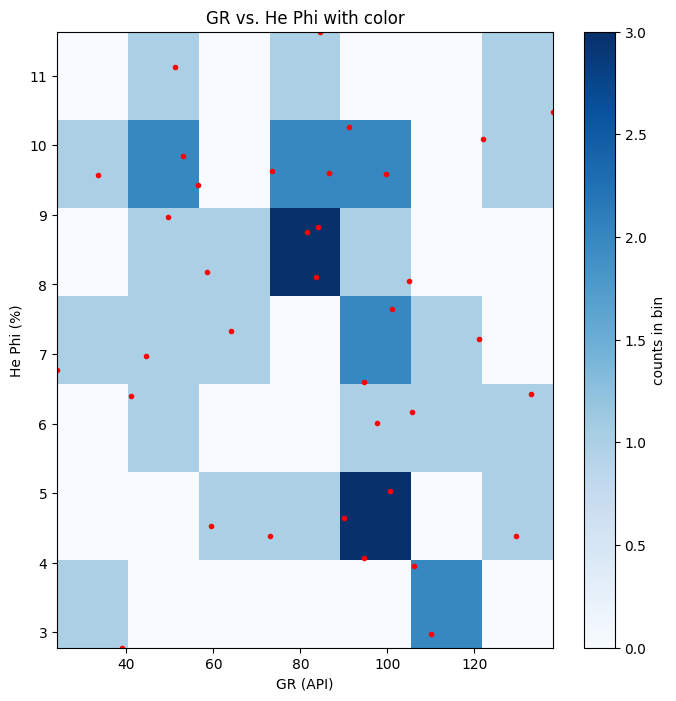

In [35]:
# We can do a similar plot but with color scale according to the density of the samples

plt.figure(figsize=(8, 8))
plt.plot(dfcore.gr, dfcore.he_phi, '.', color='r')

plt.hist2d(dfcore.gr, dfcore.he_phi, bins=7, cmap='Blues')

# Try different color maps (cmap): Reds, plasma, hot, seismic, ...

plt.title("GR vs. He Phi with color")
plt.xlabel("GR (API)")
plt.ylabel("He Phi (%)")

# New commands for the color scale

cb = plt.colorbar()
cb.set_label('counts in bin') 

plt.show()

# Aliment of dark colors indicates a degree of correlation

Matplotlib colors and color maps at: 
    
https://matplotlib.org/3.2.1/gallery/color/named_colors.html

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Let's do a all against all comparison with the Seaborn's `pairplot()`function

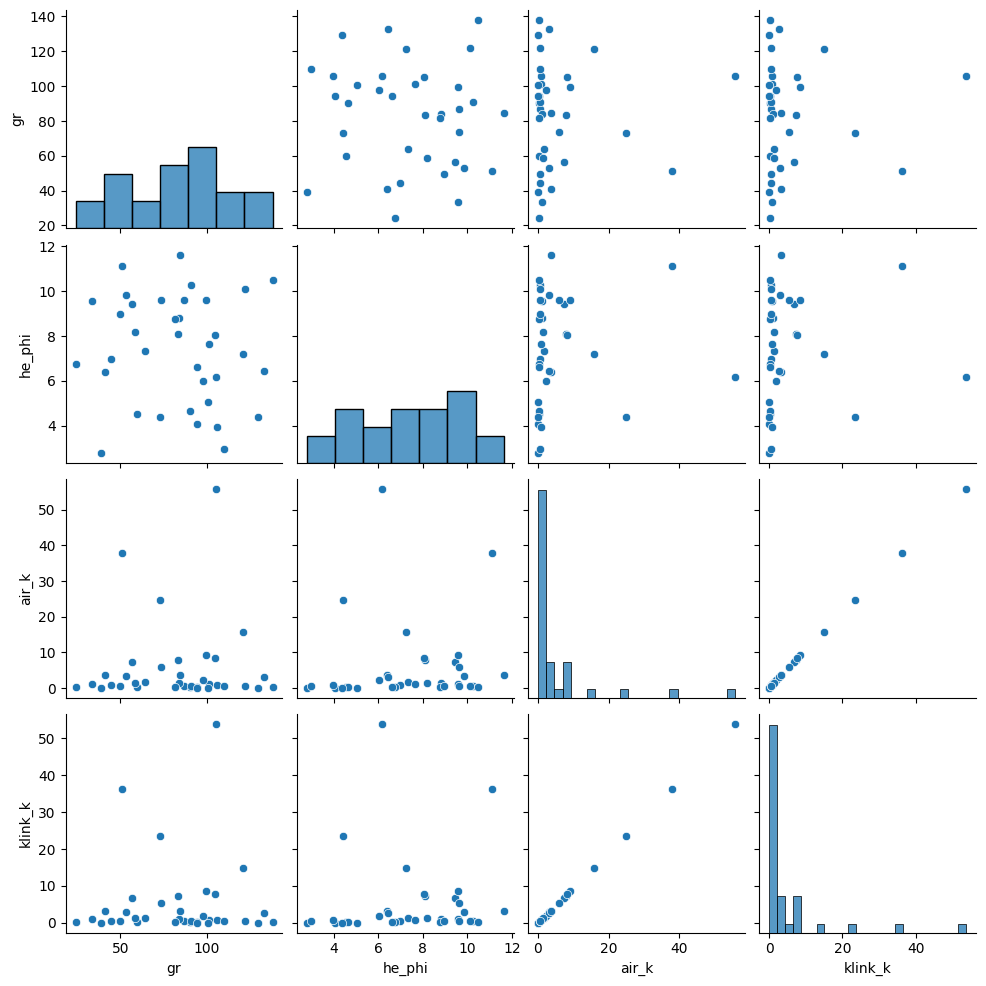

In [37]:
# The input of the pairplot function is a dataframe, let´s do a smaller dataframe

sub_dfcore = dfcore[['gr','he_phi', 'air_k', 'klink_k']]

sns.pairplot(sub_dfcore)

# Try with: diag_kind="kde"

plt.show()

<a  id="cc"></a>

<h2> 4.2 Covariance and correlation coefficient</h2>

The quantitative way to estimate correlation between to variables is calculating the covariance and correlation coefficient. Covariance is the equivalent of the variance but for two variables. The formula is:


$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^n (x_i - \mu x)(y_i - \mu y)$$

</br>

Covariance can has negative (x and y grow in inverse way) or positive value (x and y grow together). An inconvenient of this parameter is that it has units (unit of x time unit of y) which make its interpretation difficult.

</br>

<img src="NB_images\cov.png" style="width:600px">


</br>

Image from: https://www.datasciencecentral.com/profiles/blogs/preprocessing-for-deep-learning-from-covariance-matrix-to-image

A better parameter for estimating the relation on two variables  is the correlation coefficient, that is a unitless parameter, from 0 (no correlation) to 1 (maximum positive correlation or x and y grow together) or -1 (maximum negative correlation or x and y grow in inverse way). The formula is:

</br>

$$\rho (x,y) = \frac{Cov(x,y)}{\sigma x \sigma y}$$

</br>
In both formulas

x an y: are the original variables </br>
&mu;x: mean of x </br>
&mu;y: mean of y </br>
&sigma;x: standard deviation of x  </br>
&sigma;y: standard deviation of y.

These formulas and others are in the [annex](#annex).

<b>Both parameters are valid only if the variables have certain degree of linearity (upper two rows of the image above).</b><img src="NB_images\correl.png" style="width:600px">

</br>

Image form: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [38]:
# For covariance and correlation is worthy to create functions

def my_cov(x,y):
    n = len(x)
    return sum((x-np.mean(x))*(y-np.mean(y)))/(n)

def my_correl(x,y):
    n = len(x)
    return sum((x-np.mean(x))*(y-np.mean(y)))/((sum((x-np.mean(x))**2))**0.5 * (sum((y-np.mean(y))**2))**0.5)

In [39]:
# Let's do some calculations

print('Covariance of gr vs. he_phi      :',my_cov(dfcore.gr,dfcore.he_phi))
print('Correlation of gr vs. he_phi     :',my_correl(dfcore.gr,dfcore.he_phi))
print()

print('Covariance of he_phi vs. air_k   :',my_cov(dfcore.he_phi, dfcore.air_k))
print('Correlation of he_phi vs. air_k  :',my_correl(dfcore.he_phi, dfcore.air_k))
print()

print('Covariance of air_k vs. klink_k  :',my_cov(dfcore.air_k, dfcore.klink_k))
print('Correlation of air_k vs. klink_k :',my_correl(dfcore.air_k, dfcore.klink_k))

Covariance of gr vs. he_phi      : -6.478611111111113
Correlation of gr vs. he_phi     : -0.09271485875172623

Covariance of he_phi vs. air_k   : 1.9698004984567907
Correlation of he_phi vs. air_k  : 0.07274521937556293

Covariance of air_k vs. klink_k  : 124.46107654552465
Correlation of air_k vs. klink_k : 0.9999420969146127


In [40]:
# All against all correlation matrix by Panda´s corr function

correl_mat = sub_dfcore.corr()

print(type(correl_mat))

correl_mat

<class 'pandas.core.frame.DataFrame'>


,gr,he_phi,air_k,klink_k
gr,1.000000,-0.092715,0.032077,0.032613
he_phi,-0.092715,1.000000,0.072745,0.068954
air_k,0.032077,0.072745,1.000000,0.999942
klink_k,0.032613,0.068954,0.999942,1.000000


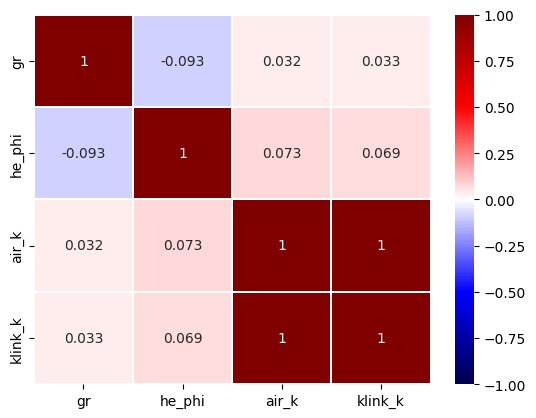

In [41]:
# All against all correlation matrix by Seaborn´s heatmap function

# graphically

sns.heatmap(correl_mat, vmin=-1, vmax=1, center=0, linewidths=.2, cmap='seismic', annot=True)
plt.show()

<a  id="annex"></a>

## Annex of formulas

In most of the statistical formulas, instead of *n* for the entire population of the random variable x, you can use *n-1* for a smaller sample of x.

Range
$$range = x_{max} - x_{min} $$

Mean (average)
$$\mu=\frac{1}{n}\sum_{i=1}^n x_i$$

Absolute deviation, with mean or median (central value of x)
$$D_i = \mid x_i - \mu \mid$$
$$D_i = \mid x_i - median \mid$$

Variance
$$\sigma^2=\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

Standard deviation
$$\sigma=\sqrt(\sigma^2)$$

Unity-base normalization
$$U = \frac{x - xmin}{xmax - xmin}$$

Z-score normalization
$$Z = \frac{x - \mu}{\sigma}$$
Normal distribution

$$f(x) = \frac{1}{\sigma\sqrt2\pi}e^-\frac{1}{2}Z^2$$

Covariance

$$Cov(x,y)=\frac{1}{n}\sum_{i=1}^n (x_i - \mu x)(y_i - \mu y)$$

Correlation coefficient

$$\rho (x,y) = \frac{Cov(x,y)}{\sigma x \sigma y}$$

Reference for the Greek letter an other symbols at:https://www.w3schools.com/charsets/ref_utf_greek.asp